In [8]:
import pandas as pd

# Data mahasiswa
mahasiswa = {
    'nama': ['Ani', 'Budi', 'Cici', 'Doni', 'Eva'],
    'jenis_kelamin': ['perempuan', 'laki-laki', 'perempuan', 'laki-laki', 'perempuan'],
    'usia': [20, 22, 21, 23, 20],
    'nilai_ipk': [3.75, 3.85, 3.65, 3.70, 3.95]
}

# Membuat DataFrame
mahasiswa_df = pd.DataFrame(mahasiswa)

# Menampilkan DataFrame
print(mahasiswa_df)

   nama jenis_kelamin  usia  nilai_ipk
0   Ani     perempuan    20       3.75
1  Budi     laki-laki    22       3.85
2  Cici     perempuan    21       3.65
3  Doni     laki-laki    23       3.70
4   Eva     perempuan    20       3.95


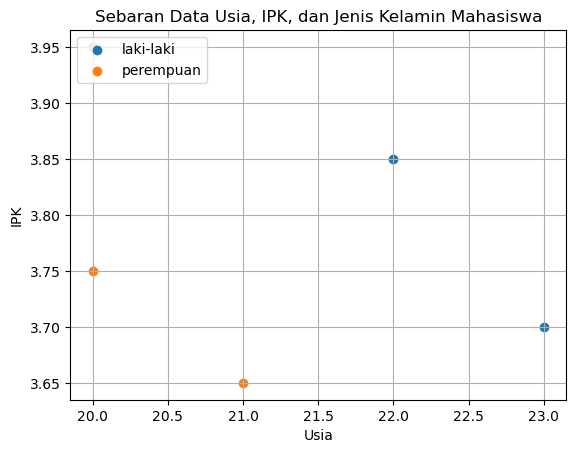

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in mahasiswa_df.groupby('jenis_kelamin'):
    ax.scatter(d['usia'], d['nilai_ipk'], label=jk)

plt.legend(loc='upper left')
plt.title('Sebaran Data Usia, IPK, dan Jenis Kelamin Mahasiswa')
plt.xlabel('Usia')
plt.ylabel('IPK')
plt.grid(True)
plt.show()

In [24]:
import numpy as np

X_train = np.array(mahasiswa_df[['usia', 'nilai_ipk']])
y_train = np.array(mahasiswa_df['jenis_kelamin'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[20.    3.75]
 [22.    3.85]
 [21.    3.65]
 [23.    3.7 ]
 [20.    3.95]]

y_train: ['perempuan' 'laki-laki' 'perempuan' 'laki-laki' 'perempuan']


In [25]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[1]
 [0]
 [1]
 [0]
 [1]]


In [26]:
y_train = y_train.flatten()
print(f'y_train: {y_train}')

y_train: [1 0 1 0 1]


In [27]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
usia = 22
nilai_ipk = 3.85
X_new = np.array([usia, nilai_ipk]).reshape(1, -1)
X_new

array([[22.  ,  3.85]])

In [29]:
y_new = model.predict(X_new)
y_new

c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0])

In [30]:
lb.inverse_transform(y_new)

array(['laki-laki'], dtype='<U9')

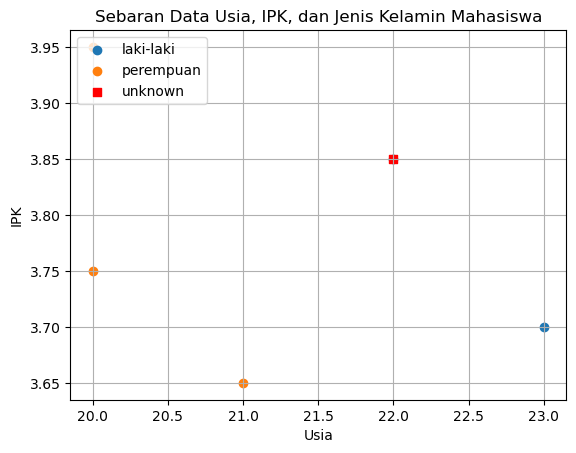

In [37]:
afig, ax = plt.subplots()
for jk, d in mahasiswa_df.groupby('jenis_kelamin'):
    ax.scatter(d['usia'], d['nilai_ipk'], label=jk)

plt.scatter(usia,
            nilai_ipk,
            marker='s',
            color='red',
            label='unknown')

plt.legend(loc='upper left')
plt.title('Sebaran Data Usia, IPK, dan Jenis Kelamin Mahasiswa')
plt.xlabel('Usia')
plt.ylabel('IPK')
plt.grid(True)
plt.show()

In [41]:
unknown = np.array([usia, nilai_ipk])
unknown

array([22.  ,  3.85])

In [42]:
X_train

array([[20.  ,  3.75],
       [22.  ,  3.85],
       [21.  ,  3.65],
       [23.  ,  3.7 ],
       [20.  ,  3.95]])

In [43]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(unknown, d) for d in X_train]
data_jarak

[2.0024984394500787,
 0.0,
 1.019803902718557,
 1.0111874208078342,
 2.0024984394500787]

In [44]:
mahasiswa_df['jarak'] = data_jarak
mahasiswa_df.sort_values(['jarak'])

,nama,jenis_kelamin,usia,nilai_ipk,jarak
1,Budi,laki-laki,22,3.85,0.000000
3,Doni,laki-laki,23,3.70,1.011187
2,Cici,perempuan,21,3.65,1.019804
0,Ani,perempuan,20,3.75,2.002498
4,Eva,perempuan,20,3.95,2.002498


In [53]:
X_test = np.array([[21, 3.70], [23, 3.60], [20, 3.90], [22, 3.85]])
y_test = lb.transform(np.array(['perempuan', 'laki-laki', 'perempuan', 'laki-laki'])).flatten()
print(f'X_test:\n{X_test}\n')
print(f'y_test:\n{y_test}')

X_test:
[[21.    3.7 ]
 [23.    3.6 ]
 [20.    3.9 ]
 [22.    3.85]]

y_test:
[1 0 1 0]


In [56]:
y_pred = model.predict(X_test)
y_pred

c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 0, 1, 0])

In [55]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print(f'Accuracy: {acc}')

Accuracy: 1.0


In [54]:
from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred)

print(f'Precission: {prec}')

Precission: 1.0


In [57]:
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)

print(f'Recall: {rec}')

Recall: 1.0


In [58]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print(f'F1-score: {f1}')

F1-score: 1.0


In [59]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)

print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [60]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)

print(f'MCC: {mcc}')

MCC: 1.0
